## Dummy Data

In [21]:
from oauth2client.service_account import ServiceAccountCredentials
from googleapiclient.discovery import build
import httplib2
import pandas as pd

import plotly.offline as py
from plotly.offline import download_plotlyjs, plot,iplot
import plotly.graph_objs as go
import cufflinks as cf
cf.set_config_file(offline=True)
from cufflinks import tools

In [6]:
def parseResponse(reponse):
    dim = []
    val = []
    # open file and read the content in a list
    with open('data/data_'+str(reponse)+'_1.txt', 'r') as filehandle:
        for line in filehandle:
            temp = line[:-1]
            dim.append(temp)
            
    with open('data/data_'+str(reponse)+'_2.txt', 'r') as filehandle:
        for line in filehandle:
            temp = line[:-1]
            temp = temp.replace("[","").replace("]","").replace("'","")
            #temp = temp.replace("'","")
            temp = temp.split(',')
            temp_list = []
            for e in temp:
                temp_list.append(e)
            val.append(temp_list)
            
    return dim,val

In [7]:
def main(request):
    res = 0
    if request == {
                'viewId': VIEW_ID, 
                'dateRanges': [{'startDate': '2019-01-01', 
                                'endDate': '2019-06-01'}],
                'metrics': [{'expression': 'ga:sessions'}], 
                'dimensions': [{"name":"ga:yearweek"}], 
                'filtersExpression':'ga:medium=~(none)'
            }:
        res = 1
    elif request == {
                'viewId': VIEW_ID, 
                'dateRanges': [{'startDate': '2019-01-01', 
                                'endDate': '2019-06-01'}],
                'metrics': [{'expression': 'ga:sessions'}], 
                'dimensions': [{"name":"ga:yearweek"}], 
                'filtersExpression':'ga:medium!=~(none)'
            }:
        res = 2
    elif request == {
                'viewId': VIEW_ID, 
                'dateRanges': [{'startDate': '2019-01-01', 
                                'endDate': '2019-06-01'}],
                'metrics': [{'expression': 'ga:pageviews'},
                            {'expression': 'ga:avgSessionDuration'},
                           {'expression': 'ga:bounceRate'}], 
                'dimensions': [{"name":"ga:landingPagePath"}],
                'orderBys': [{"fieldName": "ga:pageviews", "sortOrder": "DESCENDING"}], 
            }:
        res = 3
    return res
        

In [8]:
VIEW_ID = '139131559'

In [9]:
organic_request = {
                'viewId': VIEW_ID, 
                'dateRanges': [{'startDate': '2019-01-01', 
                                'endDate': '2019-06-01'}],
                'metrics': [{'expression': 'ga:sessions'}], 
                'dimensions': [{"name":"ga:yearweek"}], 
                'filtersExpression':'ga:medium=~(none)'
            }

nonorganic_request = {
                'viewId': VIEW_ID, 
                'dateRanges': [{'startDate': '2019-01-01', 
                                'endDate': '2019-06-01'}],
                'metrics': [{'expression': 'ga:sessions'}], 
                'dimensions': [{"name":"ga:yearweek"}], 
                'filtersExpression':'ga:medium!=~(none)'
            }

In [10]:
response1 = main(organic_request)
parsed_data1 = parseResponse(response1)

response2 = main(nonorganic_request)
parsed_data2 = parseResponse(response2)

In [11]:
df = pd.concat([pd.DataFrame(parsed_data1[0]),pd.DataFrame(parsed_data1[1])],axis=1)
df.columns = ['Date','Organic Sessions']

df['Organic Sessions'] = df['Organic Sessions'].astype('int64')
df['Date'] = df['Date'].str.slice(0,4)+'-'+df['Date'].str.slice(4,6)

In [12]:
df2 = pd.concat([pd.DataFrame(parsed_data2[0]),pd.DataFrame(parsed_data2[1])],axis=1)
df2.columns = ['Date','Non-Organic Sessions']

df2['Non-Organic Sessions'] = df2['Non-Organic Sessions'].astype('int64')
df2['Date'] = df2['Date'].str.slice(0,4)+'-'+df2['Date'].str.slice(4,6)

In [13]:
df_joined = df.merge(df2,on='Date')
df_joined

,Date,Organic Sessions,Non-Organic Sessions
0,2019-01,43,404
1,2019-02,135,453
2,2019-03,201,467
3,2019-04,220,359
4,2019-05,259,354
5,2019-06,280,389
6,2019-07,350,431
7,2019-08,369,430
8,2019-09,480,588
9,2019-10,560,692


<ipython-input-14-8fce7695555d>:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



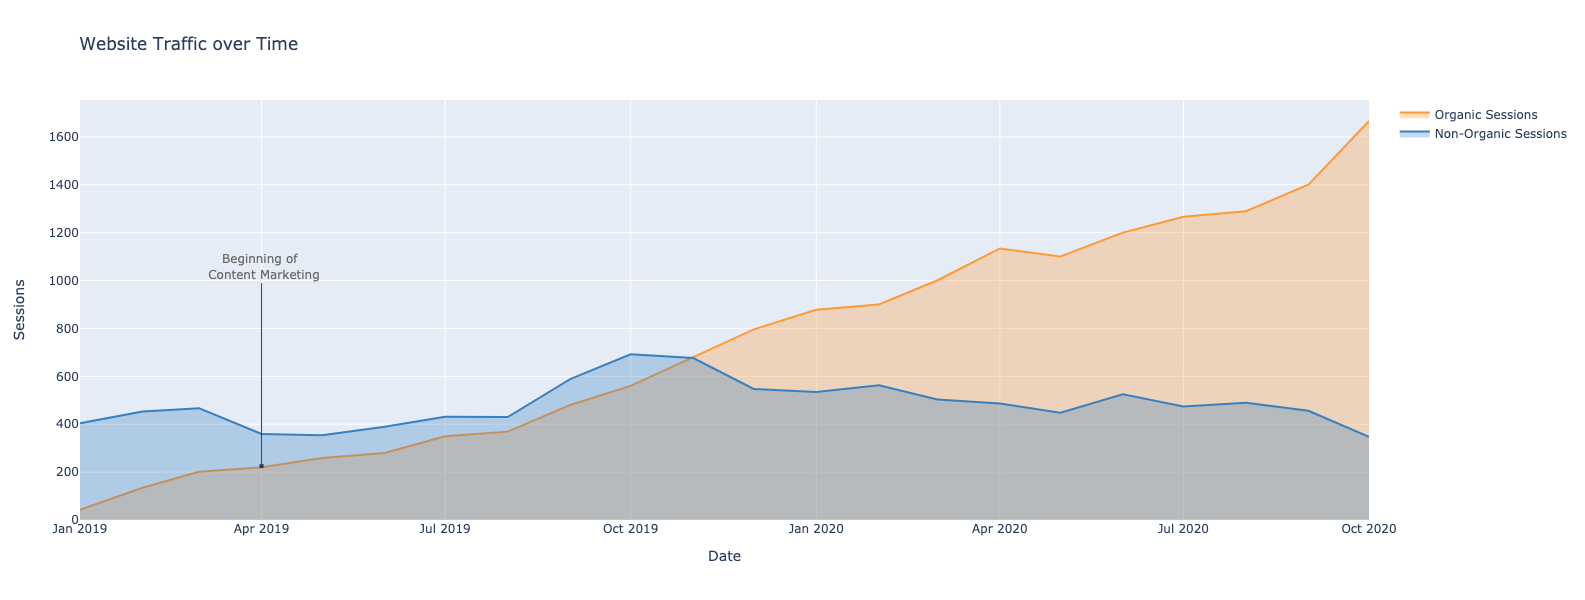

In [14]:
layout = cf.Layout(
    height = 600,
    width = 800,
    yaxis = dict(
        title = 'Sessions'),
    xaxis = dict(
        title = 'Date'),
    title = 'Website Traffic over Time'
)

fig = df_joined.groupby(['Date'],as_index=True)['Organic Sessions','Non-Organic Sessions'].mean().\
    iplot(kind='scatter',
          fill=True,
          width=2,
          asFigure=True,
          layout = layout)

fig.layout.annotations = [
        dict(
            x='2019-04',
            y='225',
            text='Beginning of <br> Content Marketing',
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-200,
            font=dict(
            size=12,
            color='rgb(107, 107, 107)'
            )
        )
]

fig.show()

In [84]:
request = {
                'viewId': VIEW_ID, 
                'dateRanges': [{'startDate': '2019-01-01', 
                                'endDate': '2019-06-01'}],
                'metrics': [{'expression': 'ga:pageviews'},
                            {'expression': 'ga:avgSessionDuration'},
                           {'expression': 'ga:bounceRate'}], 
                'dimensions': [{"name":"ga:landingPagePath"}],
                'orderBys': [{"fieldName": "ga:pageviews", "sortOrder": "DESCENDING"}], 
            }

In [85]:
response3 = main(request)
parsed_data3 = parseResponse(response3)

In [86]:
df = pd.concat([pd.DataFrame(parsed_data3[0]),pd.DataFrame(parsed_data3[1])],axis=1)
df.columns = ['Landing Page','Page Views','Avg Session Duration','Bounce Rate']

df['Page Views'] = df['Page Views'].astype('int64')
df['Avg Session Duration'] = df['Avg Session Duration'].astype('float64')
df['Bounce Rate'] = df['Bounce Rate'].astype('float64')

df.head()

,Landing Page,Page Views,Avg Session Duration,Bounce Rate
0,/homepage,13688,241.194593,35.254358
1,/journal/temperature-timeline,8993,87.922518,69.007264
2,/tutorials/notebooks-version-control,5247,41.901220,80.487805
3,/journal/income-wealth,1034,48.801546,63.659794
4,/journal/movies-recency-bias,954,103.160410,62.798635


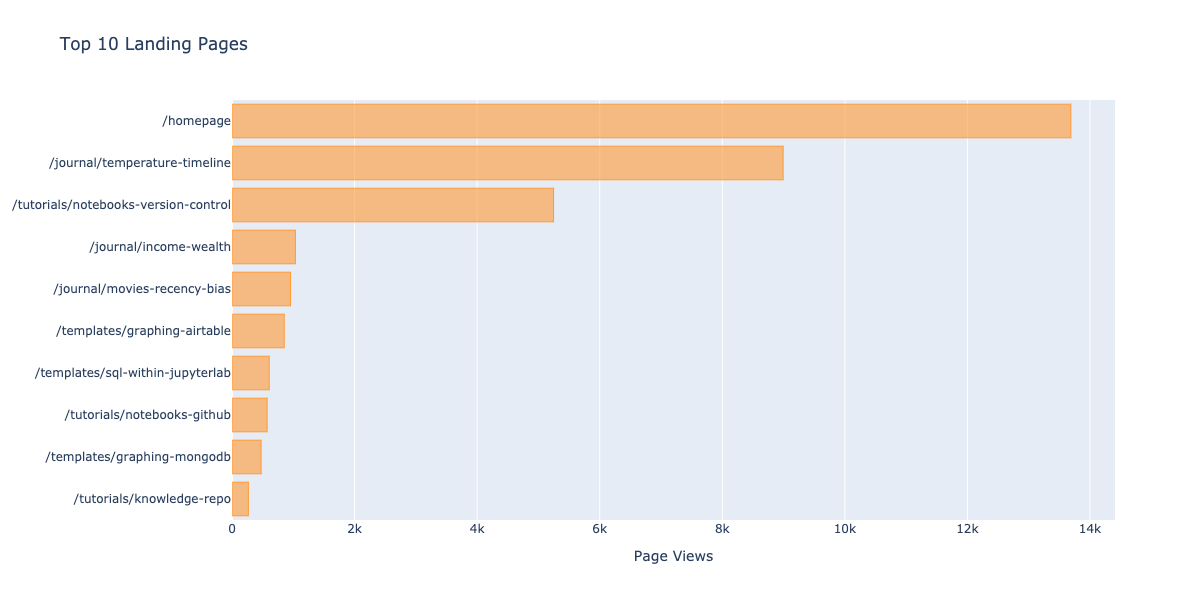

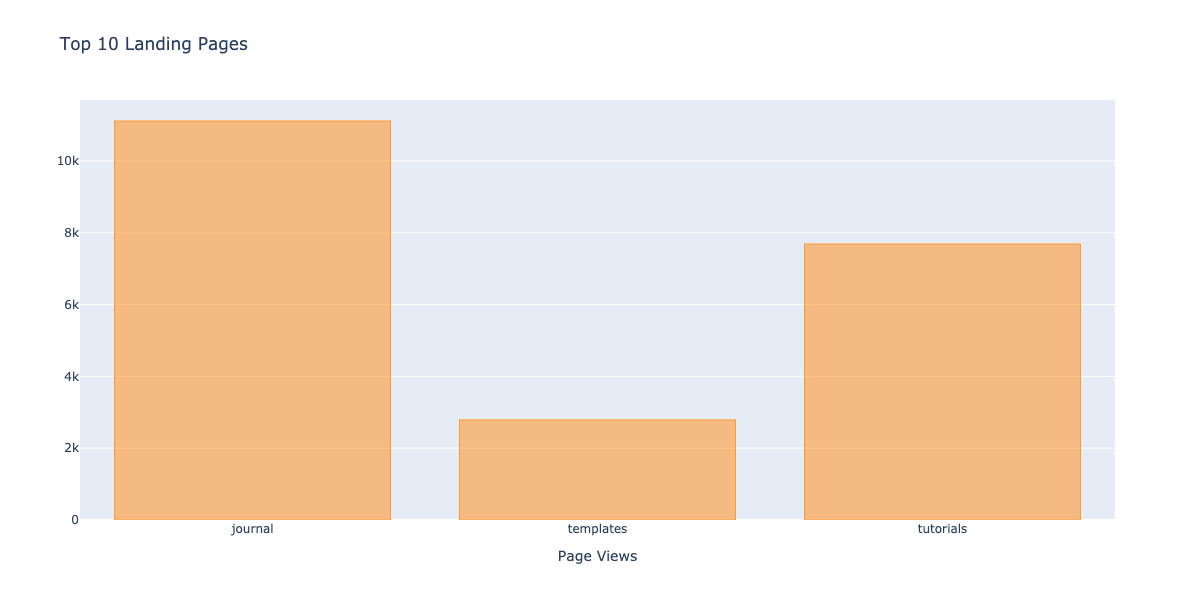

In [87]:
temp_df = df.groupby(['Landing Page'],as_index=True)['Page Views'].mean().sort_values(ascending=False).head(10)


fig = temp_df.sort_values().\
    iplot(asFigure=True,
          kind = 'barh',
         layout=layout)
    
fig.update_layout(
    margin=dict(l=200),
)

fig.show()

df['Landing Page'] = df['Landing Page'].str.rsplit('/',expand=True)[1]
df = df.iloc[1:]
df = pd.DataFrame(df.groupby(['Landing Page'],as_index=True)['Page Views'].sum())
df.iplot(asFigure=True,layout=layout, kind='bar')

In [142]:
request = {
                'viewId': VIEW_ID, 
                'dateRanges': [{'startDate': '2019-01-01', 
                                'endDate': '2019-06-01'}],
                'metrics': [{'expression': 'ga:pageviews'},
                            {'expression': 'ga:avgSessionDuration'},
                           {'expression': 'ga:bounceRate'}], 
                'dimensions': [{"name":"ga:landingPagePath"}],
                'orderBys': [{"fieldName": "ga:pageviews", "sortOrder": "DESCENDING"}], 
            }

response3 = main(request)
parsed_data3 = parseResponse(response3)

df = pd.concat([pd.DataFrame(parsed_data3[0]),pd.DataFrame(parsed_data3[1])],axis=1)
df.columns = ['Landing Page','Page Views','Avg Session Duration','Bounce Rate']

df['Page Views'] = df['Page Views'].astype('int64')
df['Avg Session Duration'] = df['Avg Session Duration'].astype('float64')
df['Bounce Rate'] = df['Bounce Rate'].astype('float64')

df['Landing Page'] = df['Landing Page'].str.rsplit('/',expand=True)[1]
df = df.iloc[1:]

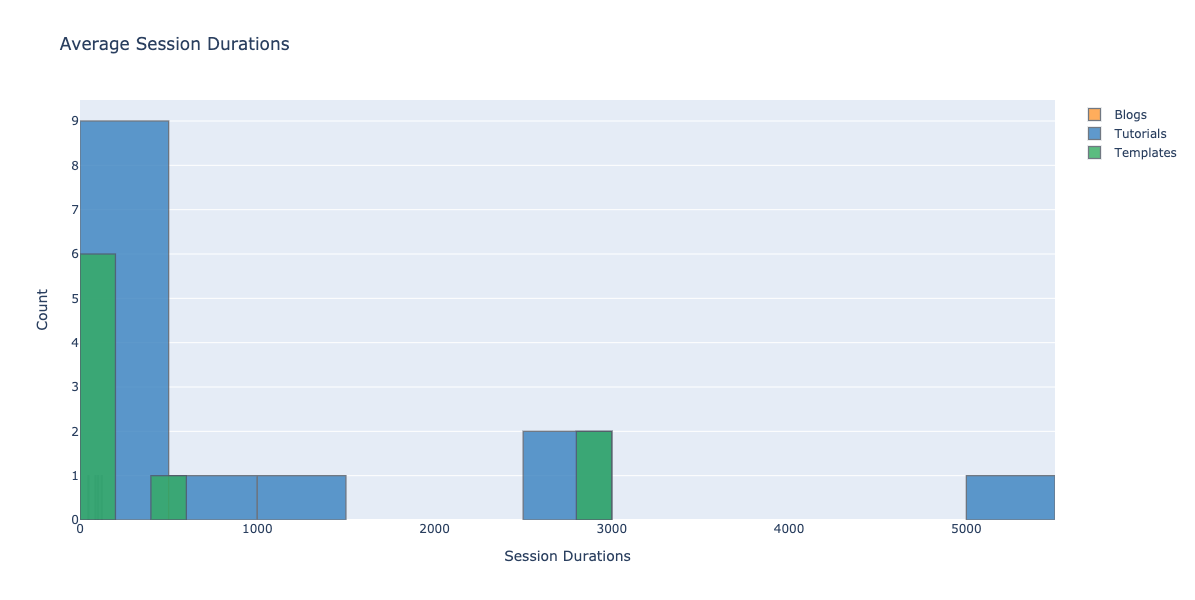

In [144]:
layout = cf.Layout(
    height = 600,
    width = 800,
    yaxis = dict(
        title = 'Count'),
    xaxis = dict(
        title = 'Session Durations'),
    title = 'Average Session Durations'
)

df["Blogs"]=df[df["Landing Page"]=="journal"]["Avg Session Duration"]
df["Tutorials"]=df[df["Landing Page"]=="tutorials"]["Avg Session Duration"]
df["Templates"]=df[df["Landing Page"]=="templates"]["Avg Session Duration"]
df[["Blogs","Tutorials","Templates"]].iplot(asFigure=True,kind="histogram", bins=20, theme="white", title="Average Session Durations",
         xTitle='Session Durations', yTitle='Count', layout=layout)

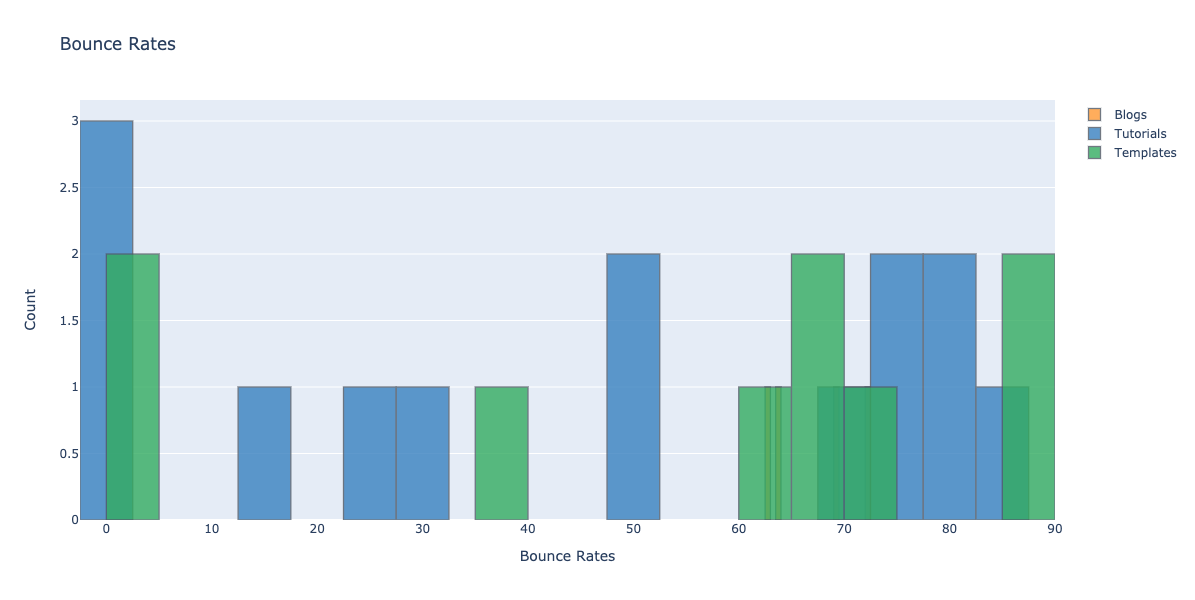

In [146]:
layout = cf.Layout(
    height = 600,
    width = 800,
    yaxis = dict(
        title = 'Count'),
    xaxis = dict(
        title = 'Bounce Rates'),
    title = 'Bounce Rates'
)

df["Blogs"]=df[df["Landing Page"]=="journal"]["Bounce Rate"]
df["Tutorials"]=df[df["Landing Page"]=="tutorials"]["Bounce Rate"]
df["Templates"]=df[df["Landing Page"]=="templates"]["Bounce Rate"]
df[["Blogs","Tutorials","Templates"]].iplot(asFigure=True,kind="histogram", bins=20, theme="white", title="Average Session Durations",
         xTitle='Session Durations', yTitle='Count', layout=layout)